# Credit Card Fraud Detection

Importing neccessary libraries for Our model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Here dataset1 represents the Training dataset and the dataset2 represents the dataset2

In [2]:
dataset1=pd.read_csv('fraudTrain.csv')
dataset2=pd.read_csv('fraudTest.csv')

## Basic Exploratory Data Analysis(EDA)

In [3]:
dataset1.head(10)#first 10 columns in training dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [4]:
dataset2.tail(10)#last 10 columns in testing dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555709,555709,2020-12-31 23:57:18,30344654314976,"fraud_Larkin, Stracke and Greenfelder",entertainment,46.71,Christine,Johnson,F,8011 Chapman Tunnel Apt. 568,...,39.8127,-120.6405,1725,Chartered legal executive (England and Wales),1967-05-27,a7105564935ea3977dc61ff9ced3bf5e,1388534238,38.963543,-120.457121,0
555710,555710,2020-12-31 23:57:50,3524574586339330,"fraud_Heathcote, Yost and Kertzmann",shopping_net,29.56,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,9fc9f6f9be3182d519a61a119cf97199,1388534270,27.593881,-80.855092,0
555711,555711,2020-12-31 23:57:56,341546199006537,fraud_Schmidt-Larkin,home,12.68,Mark,Brown,M,8580 Moore Cove,...,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,1388534276,65.623593,-165.186033,0
555712,555712,2020-12-31 23:58:04,501802953619,"fraud_Pouros, Walker and Spencer",kids_pets,13.02,Robert,Flores,M,3277 Fields Meadows Apt. 790,...,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,1388534284,41.973127,-123.553032,0
555713,555713,2020-12-31 23:58:34,3523843138706408,"fraud_Prosacco, Kreiger and Kovacek",home,17.00,Grace,Williams,F,28812 Charles Mill Apt. 628,...,32.6176,-86.9475,1412,Drilling engineer,1970-11-20,6d04313bfe4b661b8ca2b6a499a320fe,1388534314,32.164145,-87.539669,0
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [5]:
#dropping first column in our two datasets(Training and testing)
dataset1=dataset1.drop('Unnamed: 0',axis=1)
dataset2=dataset2.drop('Unnamed: 0',axis=1)

In [6]:
dataset1

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


## DataPreparation
Convert the "trans_date_trans_time" column into datetime format

In [7]:
from datetime import datetime as dt

In [8]:
dataset1["trans_date_trans_time"] = pd.to_datetime(dataset1["trans_date_trans_time"])
dataset1["trans_date"] = dataset1["trans_date_trans_time"].dt.date
dataset1["trans_date"]= pd.to_datetime(dataset1["trans_date"])

dataset1['year'] = dataset1['trans_date'].dt.year
dataset1['month'] = dataset1['trans_date'].dt.month
dataset1['day'] = dataset1['trans_date'].dt.day
#now we are same applying to test dataset
dataset2["trans_date_trans_time"] = pd.to_datetime(dataset2["trans_date_trans_time"])
dataset2["trans_date"] = dataset2["trans_date_trans_time"].dt.date
dataset2["trans_date"]= pd.to_datetime(dataset2["trans_date"])

dataset2['year'] = dataset2['trans_date'].dt.year
dataset2['month'] = dataset2['trans_date'].dt.month
dataset2['day'] = dataset2['trans_date'].dt.day

In [9]:
pd.crosstab(dataset1["category"],dataset1["is_fraud"],normalize='index')

is_fraud,0,1
category,,
entertainment,0.997522,0.002478
food_dining,0.998349,0.001651
gas_transport,0.995306,0.004694
grocery_net,0.997052,0.002948
grocery_pos,0.985902,0.014098
health_fitness,0.998451,0.001549
home,0.998392,0.001608
kids_pets,0.997886,0.002114
misc_net,0.985542,0.014458


In [10]:
pd.crosstab(dataset1["gender"],dataset1["is_fraud"],normalize='index')

is_fraud,0,1
gender,,
F,0.994738,0.005262
M,0.993574,0.006426


In [11]:
dataset1= pd.get_dummies(dataset1,columns=['category'],drop_first=True)
dataset2 = pd.get_dummies(dataset2,columns=['category'],drop_first=True)

dataset1.columns = dataset1.columns.str.replace(' ', '')
dataset2.columns = dataset2.columns.str.replace(' ', '')


## Data Analysis


Analysing isfraud by gender

<AxesSubplot:xlabel='is_fraud', ylabel='gender'>

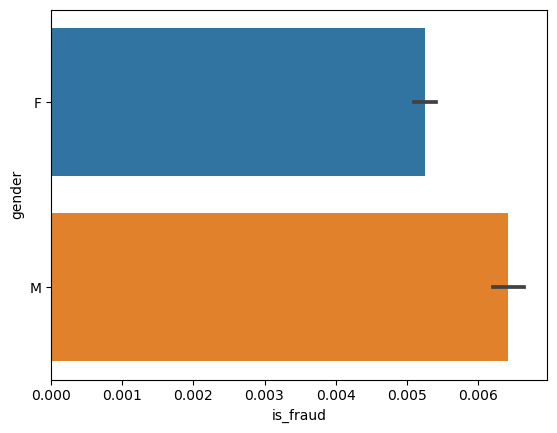

In [12]:
sn.barplot(x='is_fraud',y='gender',data=dataset1)

Gender count in our dataset1

<AxesSubplot:xlabel='gender', ylabel='count'>

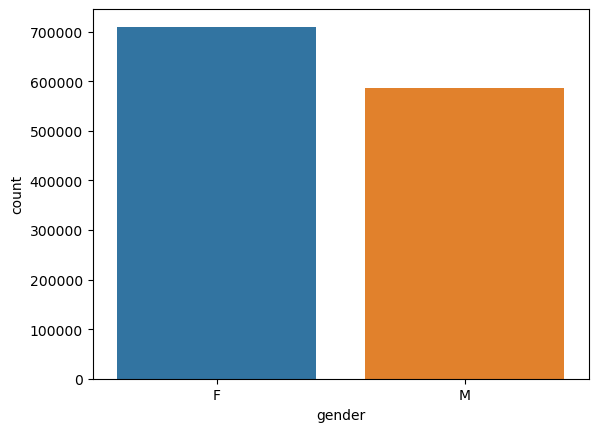

In [13]:
sn.countplot(x='gender',data=dataset1)

We are establishing a relationship between date and is fraud

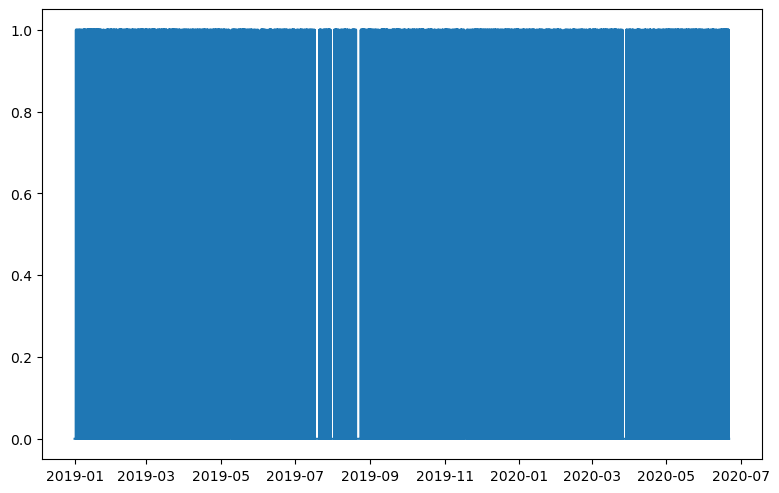

In [14]:
date_arr=dataset1["trans_date_trans_time"] 
date_arr_np=date_arr.to_numpy()
fig = plt.figure(figsize=(8,5),dpi=100)
axes = fig.add_axes([0.1,0.1,0.9,0.9])
plt.plot(date_arr_np, dataset1['is_fraud'])

In [15]:
dataset1["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [16]:
dataset2["is_fraud"].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [17]:
dataset1.groupby("is_fraud")['amt'].max()

is_fraud
0    28948.90
1     1376.04
Name: amt, dtype: float64

In [18]:
dataset1.groupby("is_fraud")['amt'].min()

is_fraud
0    1.00
1    1.06
Name: amt, dtype: float64

In [19]:
dataset1.groupby("is_fraud")['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

I am dropping unneccessary columns in our dataset

In [20]:
dataset1 =dataset1.drop(['zip','lat','long','unix_time','merch_lat','merch_long'],axis=1)
dataset2 =dataset2.drop(['zip','lat','long','unix_time','merch_lat','merch_long'],axis=1)

In [21]:
dataset1

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,...,0,0,0,0,0,0,0,0,0,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,...,0,0,0,0,0,0,0,0,0,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,...,0,0,0,0,0,0,0,0,0,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,...,0,0,0,0,0,0,0,0,0,0


In [22]:
dataset1=dataset1.drop('trans_date_trans_time',axis=1)

In [23]:
dataset1.dtypes

cc_num                              int64
merchant                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
city_pop                            int64
job                                object
dob                                object
trans_num                          object
is_fraud                            int64
trans_date                 datetime64[ns]
year                                int64
month                               int64
day                                 int64
category_food_dining                uint8
category_gas_transport              uint8
category_grocery_net                uint8
category_grocery_pos                uint8
category_health_fitness             uint8
category_home                     

In [24]:
dataset1.columns = dataset1.columns.str.replace(' ', '')
dataset2.columns = dataset2.columns.str.replace(' ', '')

train = dataset1.select_dtypes(include='number')
test = dataset2.select_dtypes(include='number')

In [25]:
train.dtypes

cc_num                       int64
amt                        float64
city_pop                     int64
is_fraud                     int64
year                         int64
month                        int64
day                          int64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
dtype: object

## Model Evaluation

I would be like to use Decision Tree Classifier to our dataset which is more suitable to us after analysing our dataset

In [26]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(train.drop('is_fraud',axis=1),train['is_fraud'])

DecisionTreeClassifier()

In [27]:
y_pred=model.predict(test.drop('is_fraud',axis=1))

In [28]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

### Classifiacation Report

In [30]:
matrix = classification_report(test['is_fraud'],y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.56      0.53      2145
           0       1.00      1.00      1.00    553574

    accuracy                           1.00    555719
   macro avg       0.75      0.78      0.76    555719
weighted avg       1.00      1.00      1.00    555719



### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test['is_fraud'],y_pred)

<AxesSubplot:>

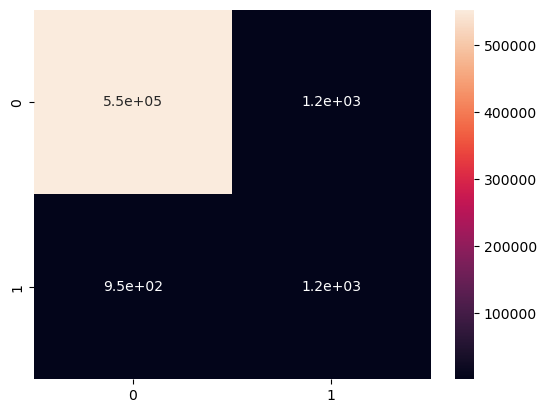

In [32]:
import seaborn as sn 
sn.heatmap(cm,annot=True)

### Accuracy of our model

In [33]:
model.score(test.drop('is_fraud',axis=1),test['is_fraud'])

0.996102346689604

I had concluded that by applying this model to our dataset, we have achieved an impressive accuracy rate of 99.6%. Through my own analysis, it is evident that we have indeed developed the most optimal model for our dataset.